In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections
import matplotlib.animation
import matplotlib.colors
from IPython.display import HTML

# Q1

$w^{(t+1)} = w^{(t)} - \eta_{t}(\bigtriangledown\hat{L_{x,y}}(w^{(t)}) + 2α{w^{(t)}})$

# Q2

パラメータベクトルが大きくなると L2ノルムも増大するためQ1の反復式の負の項目が増大する。ゆえにパラメータベクトルが負の方向に更新され、大きくなりすぎることが防がれる

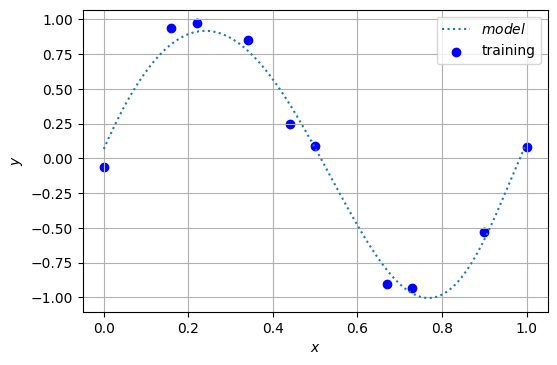

In [53]:
# Q3

X = np.array([ 0.  ,  0.16,  0.22,  0.34,  0.44,  0.5 ,  0.67,  0.73,  0.9 ,  1.  ])
Y = np.array([-0.06,  0.94,  0.97,  0.85,  0.25,  0.09, -0.9 , -0.93, -0.53,  0.08])

X_2 = np.array([[x ** i for i in range(10)] for x in X])
w = np.zeros(X_2.shape[1])

max_epochs = 5000000
eta0 = 1.0
eps=1e-15
alpha = 1e-6
# ハイパーパラメータをもう少しいい感じにできるかもしれないが割愛

for t in range(max_epochs):
  eta = eta0 / np.sqrt(1+t)
  i = np.random.randint(0, X_2.shape[0])
  y_hat = np.dot(X_2[i], w)
  grad = 2 * (y_hat - Y[i]) * X_2[i] + 2 * alpha * w
  if np.sum(np.abs(grad)) < eps:
    break
  w -= eta * grad

fig, ax = plt.subplots(dpi=100)
ax.scatter(X, Y, marker='o', color='b', label="training")
x = np.linspace(0, 1, 1000)
ax.plot(x, w[0] +\
        w[1] * x ** 1+\
        w[2] * x ** 2+\
        w[3] * x ** 3+\
        w[4] * x ** 4+\
        w[5] * x ** 5+\
        w[6] * x ** 6+\
        w[7] * x ** 7+\
        w[8] * x ** 8+\
        w[9] * x ** 9\
        ,  label=r'$model$', linestyle="dotted")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='upper right')
ax.grid()

In [75]:
# MSE 
np.mean((Y - np.dot(X_2, w)) ** 2)

0.007312431124974102